In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import pdb
from Environment import *

In [43]:
def generateEpisode(env,policy):
    state = env.reset()
#     print(state)
    episod = []
    while True:
        action = np.random.choice(actions,p=policy)
        new_state,reward,flag = env.step(action)
        
#         print(action,new_state,reward)
        episod.append((state,action,reward))
        state = new_state
        if reward == 10:
            break
    return episod

In [44]:
env = Environment('4x4')
policy = [0.25,0.25,0.25,0.25]
actions = ['u','r','l','d']

In [45]:
def computeQvalues(eps,env,policy,discount):
    
    G_value = defaultdict(lambda: np.zeros(1))
    number_of_visit = defaultdict(lambda: np.zeros(1))
    Q_value = defaultdict(lambda: np.zeros(1))
    
    for ep in range(eps):
        episod = generateEpisode(env,policy)
        states,action,reward = zip(*episod)
        gammas = discount**np.arange(len(action))
        
        for i,state in enumerate(states):
            G_value[tuple(state)] += np.sum(gammas*reward)
            number_of_visit[tuple(state)] += 1
            Q_value[tuple(state)] = G_value[tuple(state)]/number_of_visit[tuple(state)]
#             pdb.set_trace()
    
    return Q_value

In [46]:
q = computeQvalues(1000,env,policy,1)
q_mat = np.zeros([4,4])
for i in range(4):
    for j in range(4):
        q_mat[i,j] = q[(i,j)]

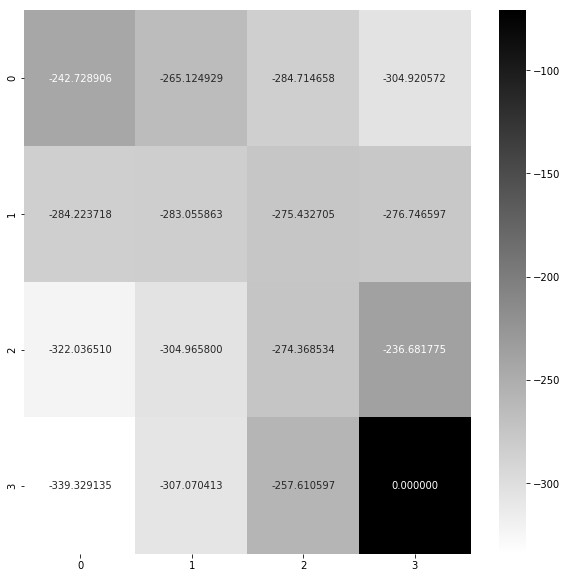

In [47]:
# uniform_data = np.random.randint(0,10,(15,15))/7
plt.figure(figsize=(10,10,))
ax = sns.heatmap(q_mat, annot=True,cmap='binary',fmt='f',robust=True)